#### making a second notebook, as the first one got a bit messy

In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import os

In [2]:
# define a function that is useful for quickly saving a pandas dataframe to an excel
import os
import string
import pandas as pd

def df_xl(df, base_name="data_output"):
    """
    Saves a DataFrame to the 'datasets' folder with incremental alphabetical filenames
    (a–z), then numeric ones (1, 2, 3...).
    Example:
        data_output_a.xlsx, data_output_b.xlsx, ..., data_output_z.xlsx, data_output_1.xlsx, ...
    """

    # Ensure the 'datasets' folder exists
    os.makedirs('datasets', exist_ok=True)

    # List existing files in the folder
    existing_files = [f for f in os.listdir('datasets') if f.startswith(base_name) and f.endswith('.xlsx')]

    # Determine the next filename
    used_suffixes = set()
    for f in existing_files:
        suffix = f[len(base_name):-5]  # remove prefix and .xlsx
        if suffix.startswith("_"):
            suffix = suffix[1:]  # remove leading underscore
        used_suffixes.add(suffix)

    # Generate the next suffix (a–z, then numbers)
    next_suffix = None
    for letter in string.ascii_lowercase:  # a–z
        if letter not in used_suffixes:
            next_suffix = letter
            break
    if next_suffix is None:
        # All letters used — find next number
        numbers = [int(s) for s in used_suffixes if s.isdigit()]
        next_suffix = str(max(numbers) + 1 if numbers else 1)

    # Build the filename and path
    filename = f"{base_name}_{next_suffix}.xlsx"
    output_path = os.path.join(os.getcwd(), "datasets", filename)

    # Save the DataFrame
    df.to_excel(output_path, index=False)
    print(f"DataFrame saved to: {output_path}")


In [3]:
# import the spotify tracks dataset
tracks_df = pd.read_csv("datasets/dataset.csv")

In [4]:
# tidy up the genre column

# first replace the hyphens with underscores
tracks_df['track_genre_cln']  = tracks_df['track_genre'].str.replace('-','_', regex = False)

# check that it worked as desired
test = tracks_df[['track_genre', 'track_genre_cln']].drop_duplicates()
print(test)

# all good

        track_genre track_genre_cln
0          acoustic        acoustic
1000       afrobeat        afrobeat
2000       alt-rock        alt_rock
3000    alternative     alternative
4000        ambient         ambient
...             ...             ...
109000       techno          techno
110000       trance          trance
111000     trip-hop        trip_hop
112000      turkish         turkish
113000  world-music     world_music

[114 rows x 2 columns]


In [5]:
# convert the cln column to a wide
tracks_df['track_genre_cln'] = tracks_df['track_genre_cln'].astype('category')
print(tracks_df.info()) # worked as desired

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        114000 non-null  int64   
 1   track_id          114000 non-null  object  
 2   artists           113999 non-null  object  
 3   album_name        113999 non-null  object  
 4   track_name        113999 non-null  object  
 5   popularity        114000 non-null  int64   
 6   duration_ms       114000 non-null  int64   
 7   explicit          114000 non-null  bool    
 8   danceability      114000 non-null  float64 
 9   energy            114000 non-null  float64 
 10  key               114000 non-null  int64   
 11  loudness          114000 non-null  float64 
 12  mode              114000 non-null  int64   
 13  speechiness       114000 non-null  float64 
 14  acousticness      114000 non-null  float64 
 15  instrumentalness  114000 non-null  float64 
 16  li

In [ ]:
# solution
# make one dataset of unique track_id, trackname, artist album etc. EXCEPT the genre, and just take the max of popularity
# make a second dataset of unique track_id, trackname, artist album, all the unique genres linked to it, but making sure to leave out the popularity part
# make the second dataset wide, then left join it onto the first
# then it'll be clean and red for exploratory analysis

In [6]:
# make the first dataset
tracks_df_build1 = tracks_df[['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms'
                            , 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness'
                            , 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
tracks_df_build1.info() # 1140k records


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [8]:
# drop the duplicates
tracks_df_build1a = tracks_df_build1.drop_duplicates()
tracks_df_build1a.info() # 90k records

<class 'pandas.core.frame.DataFrame'>
Index: 90461 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          90461 non-null  object 
 1   artists           90460 non-null  object 
 2   album_name        90460 non-null  object 
 3   track_name        90460 non-null  object 
 4   popularity        90461 non-null  int64  
 5   duration_ms       90461 non-null  int64  
 6   explicit          90461 non-null  bool   
 7   danceability      90461 non-null  float64
 8   energy            90461 non-null  float64
 9   key               90461 non-null  int64  
 10  loudness          90461 non-null  float64
 11  mode              90461 non-null  int64  
 12  speechiness       90461 non-null  float64
 13  acousticness      90461 non-null  float64
 14  instrumentalness  90461 non-null  float64
 15  liveness          90461 non-null  float64
 16  valence           90461 non-null  float64
 1

In [9]:
# now just take all values and the maximum populatiry value

# Define which column to aggregate
agg_col = 'popularity'

# Group by all other columns
group_cols = [c for c in tracks_df_build1a.columns if c != agg_col]

# Aggregate
tracks_df_build1b = tracks_df_build1a.groupby(group_cols, as_index=False)[agg_col].max()

In [10]:
# output and make sure I'm happy with it
tracks_df_build1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   duration_ms       89740 non-null  int64  
 5   explicit          89740 non-null  bool   
 6   danceability      89740 non-null  float64
 7   energy            89740 non-null  float64
 8   key               89740 non-null  int64  
 9   loudness          89740 non-null  float64
 10  mode              89740 non-null  int64  
 11  speechiness       89740 non-null  float64
 12  acousticness      89740 non-null  float64
 13  instrumentalness  89740 non-null  float64
 14  liveness          89740 non-null  float64
 15  valence           89740 non-null  float64
 16  tempo             89740 non-null  float6

In [11]:
# moving on to the second dataset
tracks_df_build2 = tracks_df[['track_id', 'artists', 'album_name', 'track_name', 'track_genre_cln']]
tracks_df_build2.info() # 114k records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   track_id         114000 non-null  object  
 1   artists          113999 non-null  object  
 2   album_name       113999 non-null  object  
 3   track_name       113999 non-null  object  
 4   track_genre_cln  114000 non-null  category
dtypes: category(1), object(4)
memory usage: 3.6+ MB


In [13]:
tracks_df_build2a = tracks_df_build2.drop_duplicates()
tracks_df_build2a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   track_id         113550 non-null  object  
 1   artists          113549 non-null  object  
 2   album_name       113549 non-null  object  
 3   track_name       113549 non-null  object  
 4   track_genre_cln  113550 non-null  category
dtypes: category(1), object(4)
memory usage: 4.4+ MB


In [14]:
# it looks like all the tracks with a different performance value, also have different values for the genre.
# it makes sense in the interest of not excluding information, to keep all genres

# so, make the dataset wide
# Create dummy variables (one-hot encoding)
dummies = pd.get_dummies(tracks_df_build2a['track_genre_cln'])

# Concatenate the dummy columns to the original DataFrame
df_wide = pd.concat([tracks_df_build2a.drop(columns=['track_genre_cln']), dummies], axis=1)

# Aggregate to remove duplicates — sum ensures 1 if category appears
tracks_df_build2b = df_wide.groupby(['track_id', 'artists', 'album_name', 'track_name'], as_index=False).sum()

In [15]:
tracks_df_build2b.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Columns: 118 entries, track_id to world_music
dtypes: int64(114), object(4)
memory usage: 80.8+ MB


In [16]:
# left join dataset 2 onto dataset 1 and do some sampling to test the popularity and category cleanings

tracks_df_cln = tracks_df_build1b.merge(tracks_df_build2b, on = ['track_id', 'artists', 'album_name','track_name'], how = 'left')
tracks_df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Columns: 133 entries, track_id to world_music
dtypes: bool(1), float64(9), int64(119), object(4)
memory usage: 90.5+ MB


In [26]:
# explore a solution for this
# how much duplication is there across track_name, artists, duration_ms

combo = tracks_df_cln[['artists', 'track_name', 'duration_ms']].value_counts().reset_index(name = 'count')
#print(combo.head(20))
combo2 = combo['count'].value_counts().reset_index(name = 'num occ')
#combo2.sort_values('count')

In [27]:
df_xl(combo2)

DataFrame saved to: c:\Users\Anne\OneDrive\Desktop\Files\_VSC_repositories\spotify_tracks\datasets\data_output_g.xlsx


In [ ]:
# brings it down to 83,000 records
# 96%  are unique
# 3% have more than 2
# 1% have 3 or more, with there being songs that have as many as 42 combinations

In [30]:
# take a sample
combo3 = combo[combo['count'] > 1]
combo_sample = combo3.sample(n = 20, random_state = 42)
print(combo_sample.head(5))

                           artists                               track_name  \
1972                     BLACKPINK                               Pink Venom   
2667         Sleepy Hallow;Fousheé                       Deep End Freestyle   
1800  Lil Tjay;Offset;Moneybagg Yo  Run It Up (feat. Offset & Moneybagg Yo)   
3328                         『ユイカ』                                   好きだから。   
51                         Ava Max                 Maybe You're the Problem   

      duration_ms  count  
1972       186964      2  
2667       115200      2  
1800       232048      2  
3328       298663      2  
51         190318     13  


In [32]:
# filter the tracks_df_cln for these records

dup_sample = tracks_df_cln.merge(combo_sample, on = ['artists', 'track_name'], how = 'inner')
#print(dup_sample.head(5))
df_xl(dup_sample)

DataFrame saved to: c:\Users\Anne\OneDrive\Desktop\Files\_VSC_repositories\spotify_tracks\datasets\data_output_h.xlsx


In [35]:
# look at a few album examples
dup_sample2 = tracks_df_cln[tracks_df_cln['album_name'].isin(['Colour By Numbers', 'I Follow Rivers (The Magician Remix)', 'The Stooges', 'Talking Dreams (Deluxe Edition)'])]
print(dup_sample2)
df_xl(dup_sample2)

                     track_id                artists  \
12137  13P5rwmk2EsoFRIz9UCeh9              Echosmith   
33883  2wSAWEYUHkt92X4SBAPqZE           Culture Club   
40734  3XDeeP9wBZzGhIPZmLfEEx           Culture Club   
49706  4Jv7lweGIUOFQ7Oq2AtAh9  Lykke Li;The Magician   
70316  672N8DGGTOLCOgWe0koX5g            The Stooges   
82389  79MMMdYL00iwKVHBSAUkLY            The Stooges   

                                 album_name  \
12137       Talking Dreams (Deluxe Edition)   
33883                     Colour By Numbers   
40734                     Colour By Numbers   
49706  I Follow Rivers (The Magician Remix)   
70316                           The Stooges   
82389                           The Stooges   

                                 track_name  duration_ms  explicit  \
12137                             Cool Kids       237626     False   
33883     Karma Chameleon - Remastered 2002       252773     False   
40734                       Karma Chameleon       252760     False 

In [ ]:
# there is only partial albums on this list, but the output does seem to match the assumption that a song's popularity is partially a function of the album it appears on
# probably best to keep the the cln dataset now as is, even though there are duplicate tracks across albums


### explore the dataset some more

In [ ]:
# who are the artists with the most tracks appearing?

print(tracks_df_cln['artists'].value_counts().reset_index) # 31k artists

<bound method Series.reset_index of artists
George Jones                                        260
my little airport                                   171
The Beatles                                         149
BTS                                                 143
Håkan Hellström                                     141
                                                   ... 
Adriana Arydes                                        1
Ron Trent;Anthony Nicholson                           1
Alex Chilton                                          1
A1 x J1;Tion Wayne                                    1
Goldie;James Davidson;Subjective;Lauren Norstrom      1
Name: count, Length: 31437, dtype: int64>


In [46]:
import pandas as pd
import string

def cat_summ(series):
    """
    Create two summary DataFrames for a categorical pandas Series.
    The DataFrames are named dynamically in the global namespace.

    Names:
      <colname>_summ
      <colname>_summ2
    If a name already exists, append an incremental letter (_a, _b, _c, ...).

    Parameters
    ----------
    series : pd.Series
        The categorical variable to summarize.
    """
    colname = series.name if series.name is not None else "var"
    s = series.dropna()

    # --- Table 1: Value counts and cumulative stats ---
    value_counts = s.value_counts(dropna=False)
    proportions = value_counts / value_counts.sum()
    cumulative_counts = value_counts.cumsum()
    cumulative_proportions = proportions.cumsum()

    summ = pd.DataFrame({
        f'{colname}_value': value_counts.index,
        f'{colname}_count': value_counts.values,
        f'{colname}_proportion': proportions.values,
        f'{colname}_cum_count': cumulative_counts.values,
        f'{colname}_cum_proportion': cumulative_proportions.values
    })

    # --- Table 2: Count of counts ---
    count_of_counts = (
        value_counts.value_counts()
        .rename_axis('count')
        .reset_index(name='n_categories')
    )
    count_of_counts['proportion'] = (
        count_of_counts['n_categories'] / count_of_counts['n_categories'].sum()
    )

    summ2 = count_of_counts.rename(columns={
        'count': f'{colname}_count_value',
        'n_categories': f'{colname}_n_categories',
        'proportion': f'{colname}_proportion'
    })

    # --- Function to generate unique variable names ---
    def unique_name(base_name):
        if base_name not in globals():
            return base_name
        for suffix in string.ascii_lowercase:
            candidate = f"{base_name}_{suffix}"
            if candidate not in globals():
                return candidate
        raise RuntimeError("Ran out of suffixes (a–z) for variable naming!")

    # Determine unique names for the two DataFrames
    summ_name = unique_name(f"{colname}_summ")
    summ2_name = unique_name(f"{colname}_summ2")

    # Assign to global namespace
    globals()[summ_name] = summ
    globals()[summ2_name] = summ2

    print(f"Created DataFrames: '{summ_name}' and '{summ2_name}'")



In [49]:
cat_summ(tracks_df_cln['artists'])
df_xl(artists_summ)
df_xl(artists_summ2)

Created DataFrames: 'artists_summ_b' and 'artists_summ2_b'
DataFrame saved to: c:\Users\Anne\OneDrive\Desktop\Files\_VSC_repositories\spotify_tracks\datasets\data_output_k.xlsx
DataFrame saved to: c:\Users\Anne\OneDrive\Desktop\Files\_VSC_repositories\spotify_tracks\datasets\data_output_l.xlsx


In [ ]:
# 65% of artists have just 1 song, 14% have 2, 95% have 10 or less

In [50]:
# Add a binary column showing if the artist name has any alphanumeric character
tracks_df_cln['alnum'] = tracks_df_cln['artists'].str.contains(r'[A-Za-z0-9]', regex=True, na=False).astype(int)

df_xl(tracks_df_cln[tracks_df_cln['alnum']== 0])

DataFrame saved to: c:\Users\Anne\OneDrive\Desktop\Files\_VSC_repositories\spotify_tracks\datasets\data_output_m.xlsx


In [ ]:
# around 500 tracks are titled in foreign scripts, seems to be a mix of japanese, cyrilic, chinese. 0.6% should be ok just to leave them
print((535/89000))

0.00601123595505618


In [53]:
# analyse the duration of the tracks
tracks_df_cln['duration_min'] = tracks_df_cln['duration_ms'] / 60000
print(tracks_df_cln[['duration_ms', 'duration_min']].head(20))

    duration_ms  duration_min
0        160725      2.678750
1        322933      5.382217
2        515360      8.589333
3        190203      3.170050
4        331240      5.520667
5        127040      2.117333
6        176320      2.938667
7        177266      2.954433
8        214600      3.576667
9        410666      6.844433
10       252342      4.205700
11       177166      2.952767
12       222973      3.716217
13       180713      3.011883
14       219482      3.658033
15       146493      2.441550
16       258760      4.312667
17       281333      4.688883
18        56200      0.936667
19       154426      2.573767


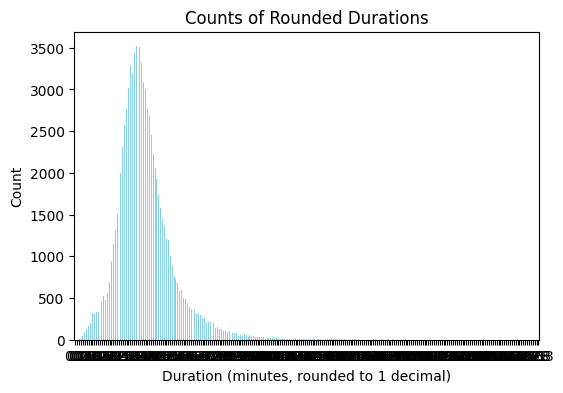

In [55]:
import matplotlib.pyplot as plt

# visualise how long songs are
tracks_df_cln['duration_min_rnd'] = tracks_df_cln['duration_min'].round(1)

# count the occurrences
counts = tracks_df_cln['duration_min_rnd'].value_counts().sort_index()

# Plot as a bar chart
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Duration (minutes, rounded to 1 decimal)')
plt.ylabel('Count')
plt.title('Counts of Rounded Durations')
plt.xticks(rotation=0)
plt.show()

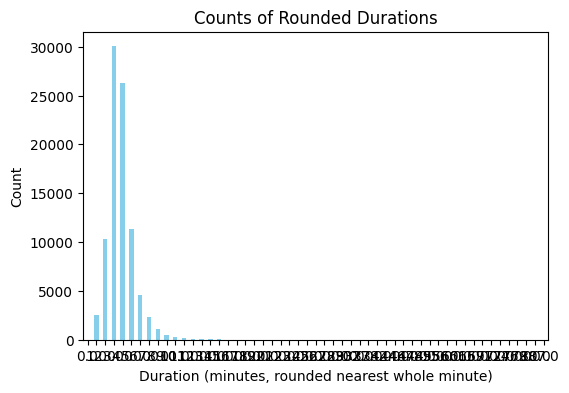

In [56]:
tracks_df_cln['duration_min_rnd0'] = tracks_df_cln['duration_min'].round(0)

# count the occurrences
counts2 = tracks_df_cln['duration_min_rnd0'].value_counts().sort_index()

# Plot as a bar chart
plt.figure(figsize=(6,4))
counts2.plot(kind='bar', color='skyblue')
plt.xlabel('Duration (minutes, rounded nearest whole minute)')
plt.ylabel('Count')
plt.title('Counts of Rounded Durations')
plt.xticks(rotation=0)
plt.show()

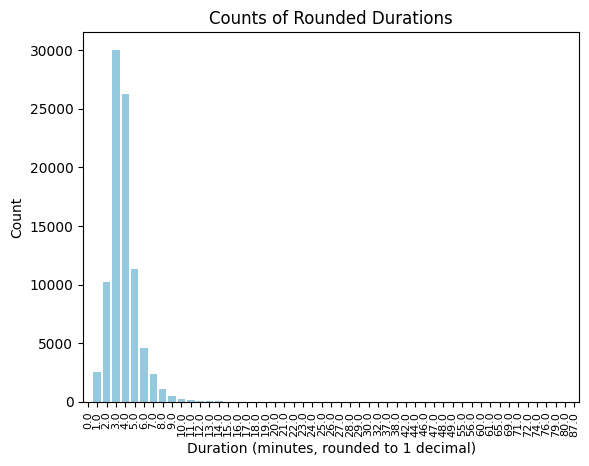

In [61]:
import seaborn as sns

sns.countplot(x='duration_min_rnd0', data=tracks_df_cln, color='skyblue')
plt.xlabel('Duration (minutes, rounded to 1 decimal)')
plt.ylabel('Count')
plt.title('Counts of Rounded Durations')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

In [62]:
# pretty much as expected, 3 to 4 minutes is the modal value
# output this data numerically

cat_summ(tracks_df_cln['duration_min_rnd0'])

Created DataFrames: 'duration_min_rnd0_summ' and 'duration_min_rnd0_summ2'


In [63]:
df_xl(duration_min_rnd0_summ)

DataFrame saved to: c:\Users\Anne\OneDrive\Desktop\Files\_VSC_repositories\spotify_tracks\datasets\data_output_n.xlsx


In [65]:
df_xl(duration_min_rnd0_summ2)

DataFrame saved to: c:\Users\Anne\OneDrive\Desktop\Files\_VSC_repositories\spotify_tracks\datasets\data_output_p.xlsx


In [ ]:
# 99.5% of songs are 10 minutes or less
#

# next, summarise the criteria fields visually
# some should first be rounded to 2 dp for simplicity of plotting ['danceability', 'energy', 'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence']
# some should be rounded to 0 dp ['loudness', 'tempo']
# some should be retagged (i.e. more detail should be added to the meaning) ['key', 'mode']



In [66]:
# round the 2 dp cols
cols_2dp = ['danceability', 'energy', 'speechiness', 'acousticness',	'instrumentalness',	'liveness',	'valence']
for col in cols_2dp:
    tracks_df_cln[f'{col}_rnd'] = tracks_df_cln[col].round(2)
print(tracks_df_cln[['energy','energy_rnd']].head(10))

   energy  energy_rnd
0   0.374        0.37
1   0.516        0.52
2   0.560        0.56
3   0.770        0.77
4   0.431        0.43
5   0.780        0.78
6   0.471        0.47
7   0.921        0.92
8   0.290        0.29
9   0.950        0.95


In [67]:
# that worked as desired
# repeat for the zero dp rounding columns
cols_0dp = ['loudness', 'tempo']
for col in cols_0dp:
    tracks_df_cln[f'{col}_rnd'] = tracks_df_cln[col].round(0).astype('int')
print(tracks_df_cln[['loudness','loudness_rnd']].head(10))

   loudness  loudness_rnd
0    -9.844           -10
1    -7.361            -7
2   -13.264           -13
3    -3.537            -4
4   -13.606           -14
5    -9.449            -9
6    -6.644            -7
7    -4.589            -5
8   -11.942           -12
9    -9.744           -10


In [85]:
# that worked as desired
# now map the other values to the desired

mode_dict = {1: 'major',
             0: 'minor'}


key_dict = {-1: '00. No Key',
            0: '01. C',
            1: '02. C♯/D♭',
            2: '03. D',
            3: '04. D♯/E♭',
            4: '05. E',
            5: '06. F',
            6: '07. F♯/G♭',
            7: '08. G',
            8: '09. G♯/A♭',
            9: '10. A',
            10: '11. A♯/B♭',
            11: '12. B'}

print(mode_dict)
print(key_dict)

{1: 'major', 0: 'minor'}
{-1: '00. No Key', 0: '01. C', 1: '02. C♯/D♭', 2: '03. D', 3: '04. D♯/E♭', 4: '05. E', 5: '06. F', 6: '07. F♯/G♭', 7: '08. G', 8: '09. G♯/A♭', 9: '10. A', 10: '11. A♯/B♭', 11: '12. B'}


In [83]:
# map these values
tracks_df_cln['mode_exp'] = tracks_df_cln['mode'].map(mode_dict)
print(tracks_df_cln[['mode', 'mode_exp']].drop_duplicates().head(10))

   mode mode_exp
0     0    minor
1     1    major


In [86]:
# that worked as desired. repeat for the key
tracks_df_cln['key_exp'] = tracks_df_cln['key'].map(key_dict)
print(tracks_df_cln[['key', 'key_exp']].drop_duplicates().head(20).sort_values(by = 'key'))

    key    key_exp
1     0      01. C
6     1  02. C♯/D♭
7     2      03. D
70    3  04. D♯/E♭
16    4      05. E
2     5      06. F
4     6  07. F♯/G♭
17    7      08. G
0     8  09. G♯/A♭
9     9      10. A
43   10  11. A♯/B♭
35   11      12. B


In [79]:
# that worked as desired, now output them as a chart
def categorical_counts(df, col):
    """
    Generate a summary dataframe for a categorical column.

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing the column.
    col : str
        Name of the categorical column.

    Returns
    -------
    pd.DataFrame
        A dataframe with:
            - value: unique category
            - count: number of occurrences
            - proportion: proportion of each category
        Sorted ascending by the categorical values.
    """
    counts = df[col].value_counts().sort_index()  # sorts by category
    proportions = counts / counts.sum()

    summary_df = pd.DataFrame({
        'value': counts.index,
        'count': counts.values,
        'proportion': proportions.values
    })

    return summary_df

In [87]:
categorical_counts(tracks_df_cln, 'key_exp')


,value,count,proportion
0,01. C,10352,0.115355
1,02. C♯/D♭,8576,0.095565
2,03. D,9327,0.103934
3,04. D♯/E♭,2769,0.030856
4,05. E,7133,0.079485
5,06. F,7308,0.081435
6,07. F♯/G♭,6139,0.068409
7,08. G,10550,0.117562
8,09. G♯/A♭,5570,0.062068
9,10. A,8998,0.100267


In [88]:
categorical_counts(tracks_df_cln, 'mode_exp')

,value,count,proportion
0,major,57162,0.636973
1,minor,32578,0.363027


In [ ]:
# mostly major (64%)

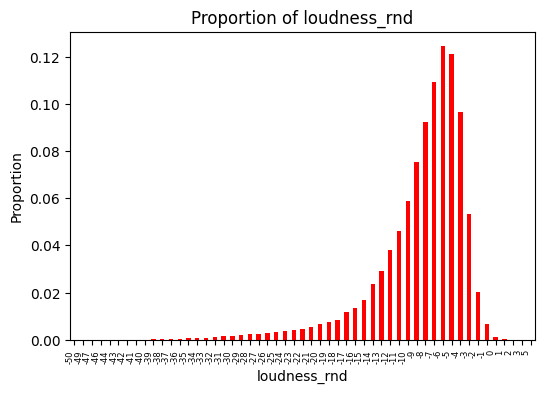

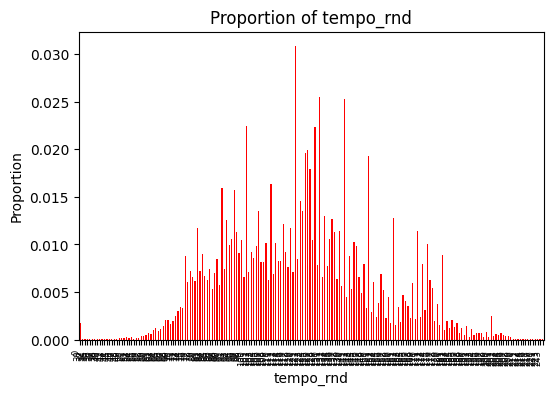

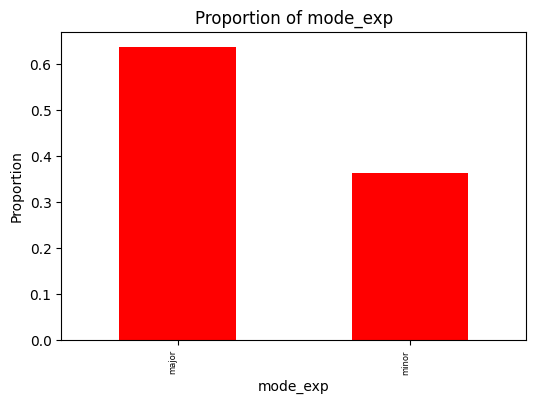

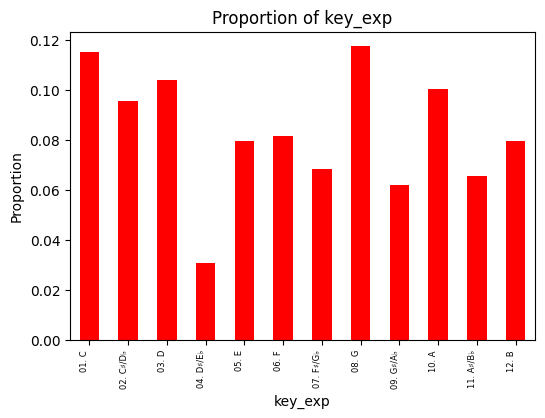

In [91]:
#  summarise visually


cat_cols = ['loudness_rnd', 'tempo_rnd', 'mode_exp', 'key_exp']

for col in cat_cols:
    counts = tracks_df_cln[col].value_counts(normalize=True).sort_index()  # proportion & sorted
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='red')
    plt.title(f'Proportion of {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.xticks(rotation=90, ha='right', fontsize = 6)  # make labels readable
    plt.show()


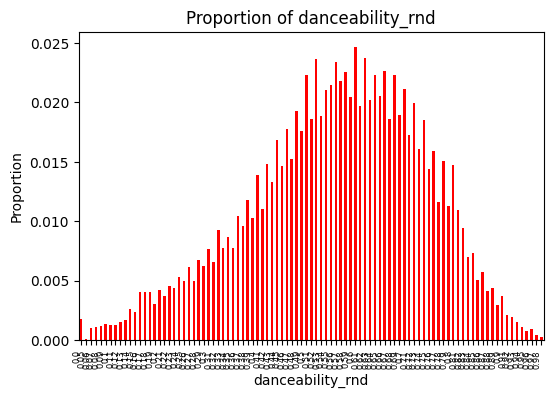

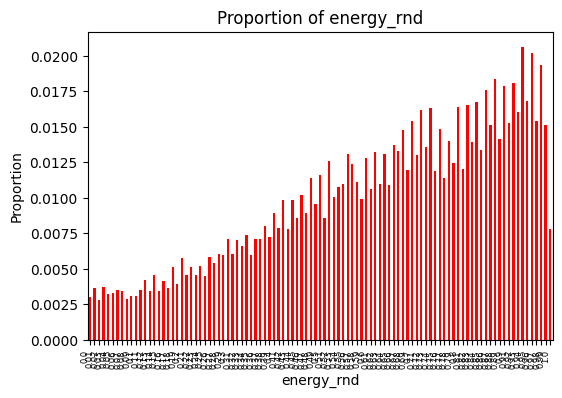

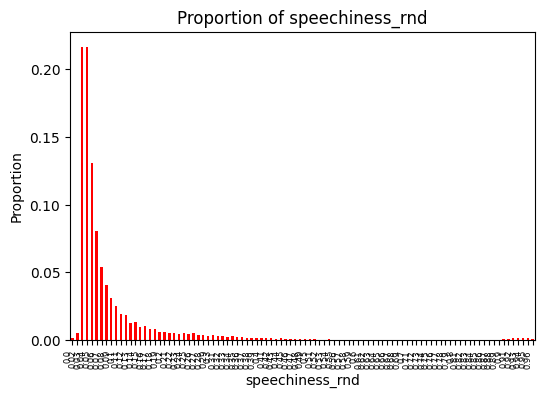

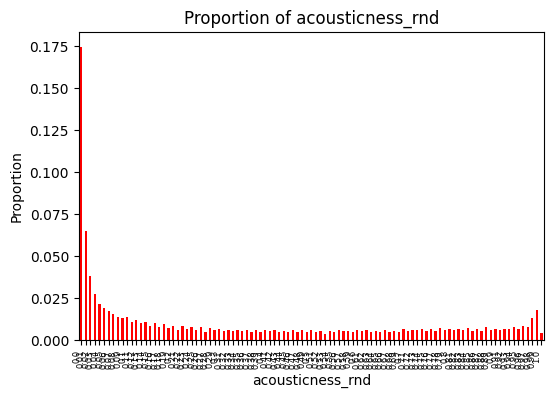

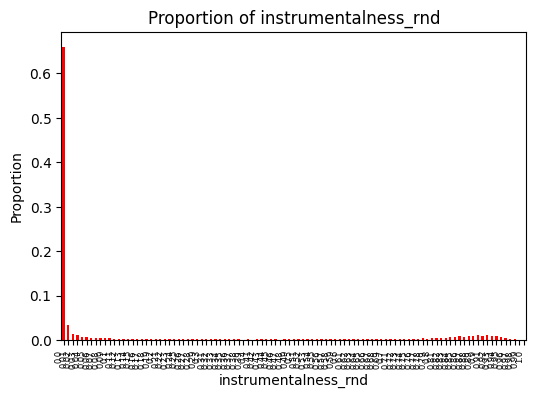

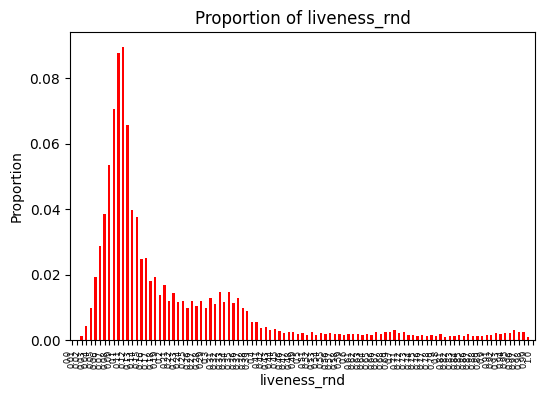

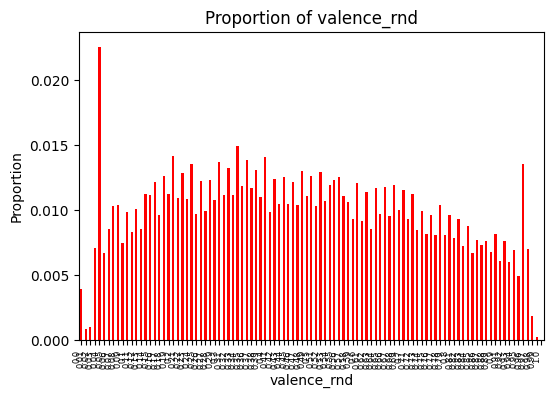

In [92]:

# repeat for the 2 dp fields
cat_cols2 = ['danceability_rnd', 'energy_rnd', 'speechiness_rnd', 'acousticness_rnd',	'instrumentalness_rnd',	'liveness_rnd',	'valence_rnd']

for col in cat_cols2:
    counts = tracks_df_cln[col].value_counts(normalize=True).sort_index()  # proportion & sorted
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='red')
    plt.title(f'Proportion of {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.xticks(rotation=90, ha='right', fontsize = 6)  # make labels readable
    plt.show()

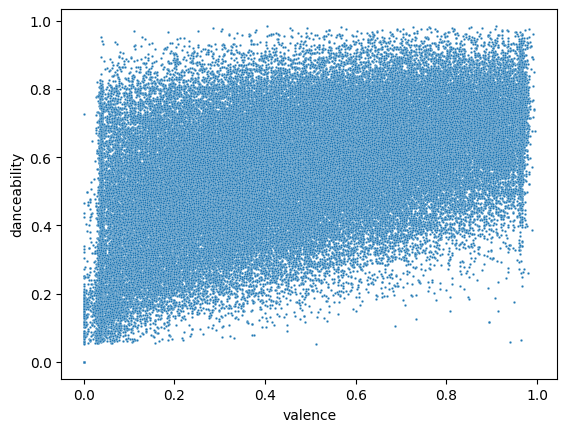

In [ ]:
# how are valence, danceability, and energy correlated?
sns.scatterplot(x = 'valence', y = 'danceability', data = tracks_df_cln, s = 3)
plt.show()
# seems to be a weak positive correlation between valence and danceability

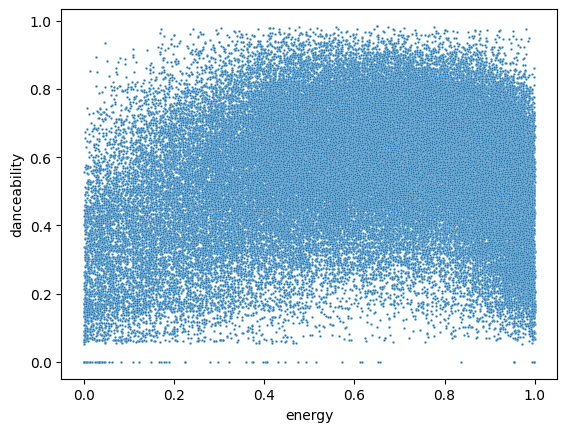

In [ ]:
sns.scatterplot(x = 'energy', y = 'danceability', data = tracks_df_cln, s = 3)
plt.show()
# appears to be a non-linear relationship between energy and danceability

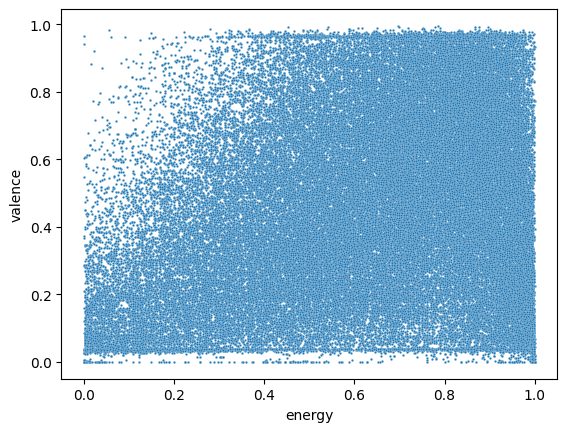

In [ ]:
sns.scatterplot(x = 'energy', y = 'valence', data = tracks_df_cln, s = 3)
plt.show()
# no particularly obvious correlation between energy and valence

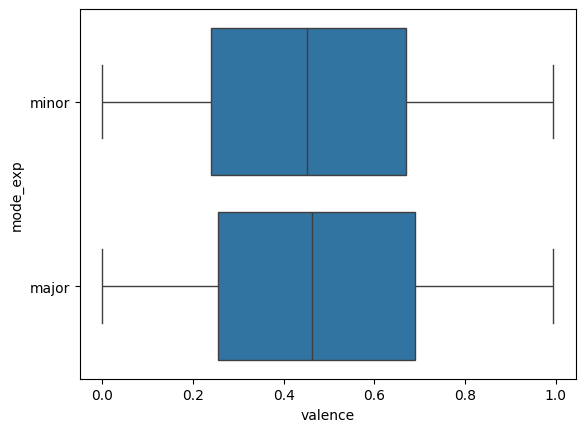

In [ ]:
# what about mode and valence?
sns.boxplot(data = tracks_df_cln, x = 'valence', y = 'mode_exp')
plt.show()
# major tracks appear to be ever so slightly happier than minor

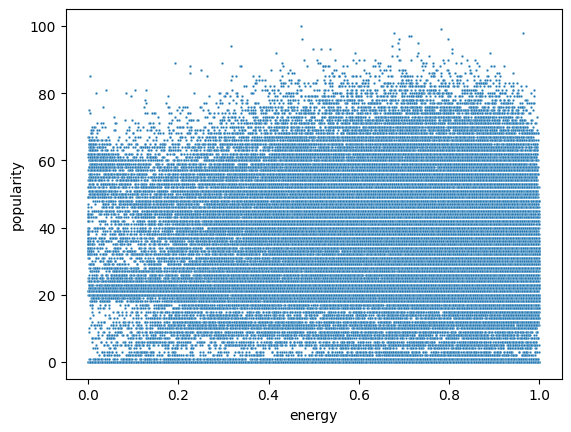

In [100]:
sns.scatterplot(x = 'energy', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

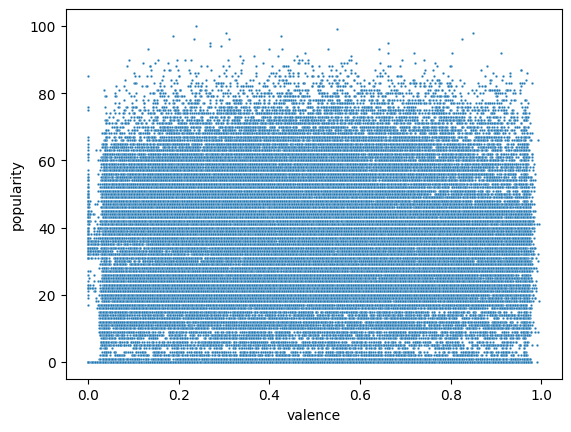

In [101]:
sns.scatterplot(x = 'valence', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

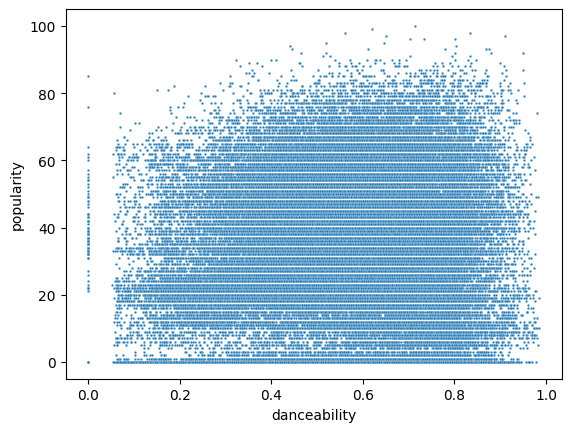

In [102]:
sns.scatterplot(x = 'danceability', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

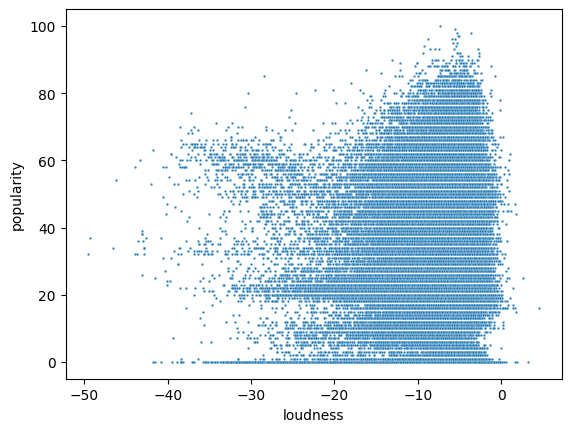

In [103]:
sns.scatterplot(x = 'loudness', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

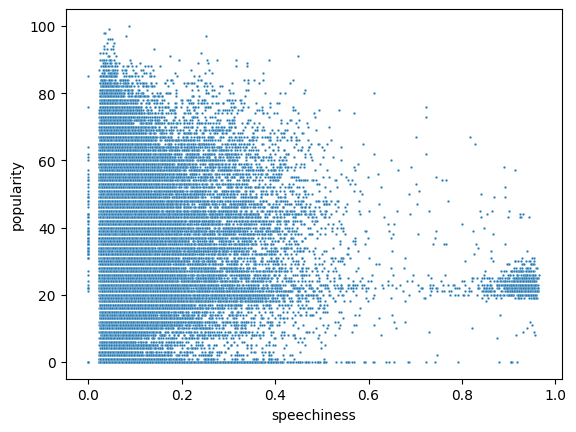

In [104]:
sns.scatterplot(x = 'speechiness', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

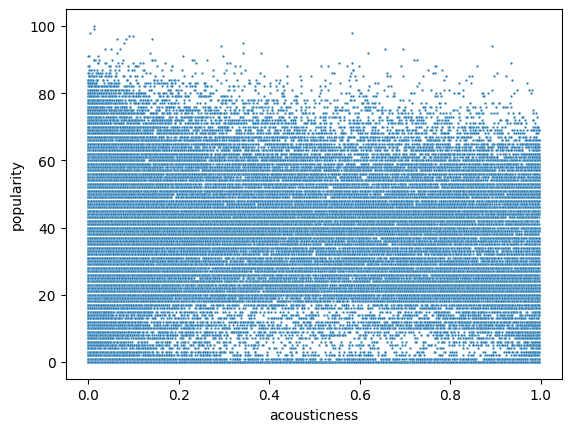

In [105]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

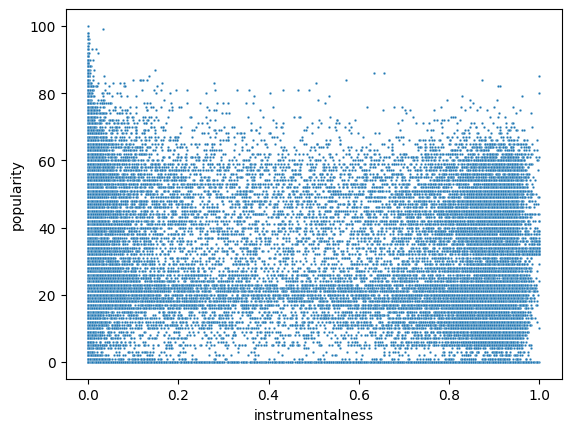

In [106]:
sns.scatterplot(x = 'instrumentalness', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

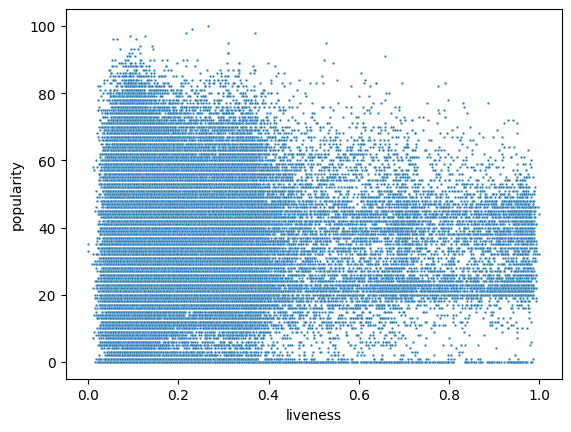

In [107]:
sns.scatterplot(x = 'liveness', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

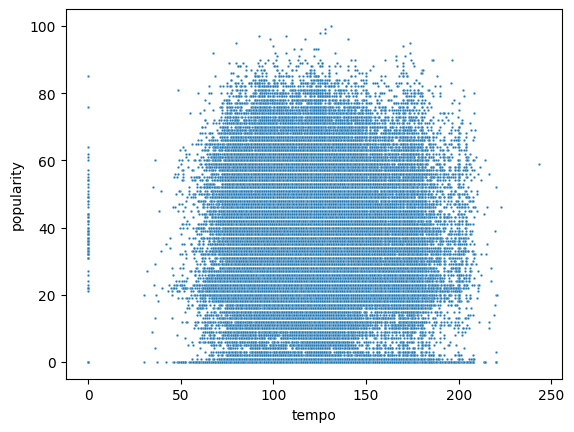

In [108]:
sns.scatterplot(x = 'tempo', y = 'popularity', data = tracks_df_cln, s = 3)
plt.show()

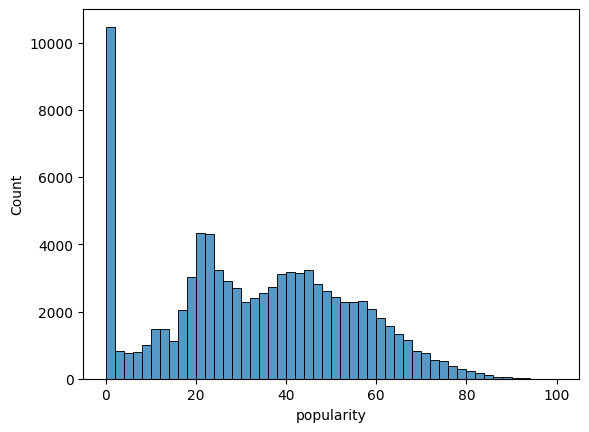

In [109]:
sns.histplot(data = tracks_df_cln, x = 'popularity', binwidth = 2)
plt.show()

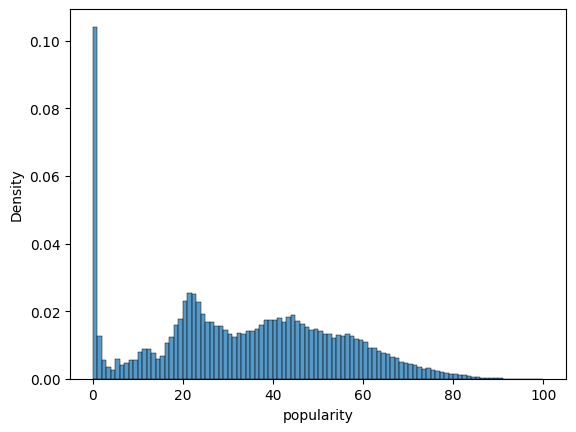

In [ ]:
sns.histplot(data = tracks_df_cln, x = 'popularity', binwidth = 1, stat = 'density')
plt.show()

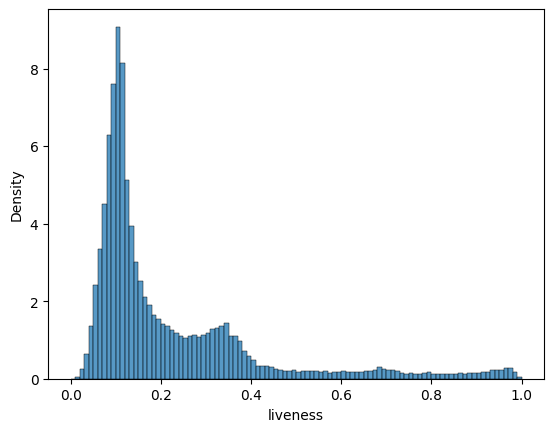

In [120]:
sns.histplot(data = tracks_df_cln, x = 'liveness', binwidth = 0.01, stat = 'density')
plt.show()

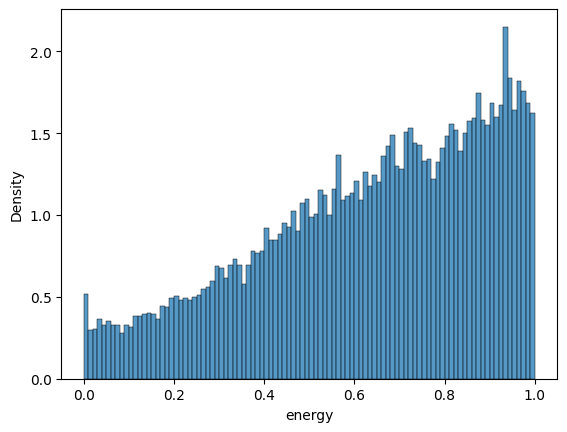

In [121]:
sns.histplot(data = tracks_df_cln, x = 'energy', binwidth = 0.01, stat = 'density')
plt.show()